In [1]:
"""
Train shallow neural networks on a synthetic classification dataset using convex optimization.
"""

import sys
sys.path.append("..")

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from convex_nn.private.utils.data import gen_classification_data


from convex_nn.models import ConvexGatedReLU, ConvexReLU
from convex_nn.solvers import RFISTA, AL, LeastSquaresSolver, CVXPYSolver
from convex_nn.regularizers import NeuronGL1, L2, L1
from convex_nn.metrics import Metrics
from convex_nn.activations import sample_gate_vectors
from convex_nn.optimize import optimize_model, optimize

In [3]:
# Generate realizable synthetic classification problem (ie. Figure 1)
n_train = 1000
n_test = 1000
d = 50
hidden_units = 100
kappa = 10  # condition number

(X_train, y_train), (X_test, y_test) = gen_classification_data(123, n_train, n_test, d, hidden_units, kappa)

In [4]:
lam = 0.001
max_neurons = 500
G = sample_gate_vectors(123, d, max_neurons)
metrics = Metrics(metric_freq=25, model_loss=True, train_accuracy=True, train_mse=True, test_mse=True, test_accuracy=True, neuron_sparsity=True)

In [5]:
model, _ = optimize("gated_relu", 
                          max_neurons, 
                          X_train, 
                          y_train, 
                          X_test, 
                          y_test,
                          regularizer = NeuronGL1(0.01),
                          verbose=True,  
                          device="cpu")

INFO:convex_nn:Pre-Optimization Metrics: Train Set objective: 0.5, Train Set grad_norm: 0.007702790706538584, 


fista:   0%|          | 0/10000 [00:00<?, ?it/s]

INFO:convex_nn:Termination criterion satisfied at iteration 20/10000. Exiting optimization loop.
INFO:convex_nn:Post-Optimization Metrics: Train Set objective: 0.4586989605079592, Train Set grad_norm: 9.152438347338347e-07, 


Train Set objective: 0.5, Train Set grad_norm: 0.007702790706538584, 


In [6]:
# Instantiate convex model and other options.
model = ConvexGatedReLU(G)
solver = RFISTA(model, tol=1e-8)
regularizer = NeuronGL1(0.01)

In [7]:
grelu_model, grelu_metrics = optimize_model(
    model,
    solver,
    metrics,
    X_train, 
    y_train, 
    X_test, 
    y_test,
    regularizer=L2(0.001),
    verbose=True,
)

INFO:convex_nn:Pre-Optimization Metrics: Train Set objective: 0.5, Train Set grad_norm: 0.09645779567347587, Train Set base_objective: 0.5, Train Set accuracy: 0.0, Train Set nc_squared_error: 0.5, Test Set nc_accuracy: 0.0, Test Set nc_squared_error: 0.5, group_sparsity: 1.0, 


fista:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.5, Train Set grad_norm: 0.09645779567347587, Train Set base_objective: 0.5, Train Set accuracy: 0.0, Train Set nc_squared_error: 0.5, Test Set nc_accuracy: 0.0, Test Set nc_squared_error: 0.5, group_sparsity: 1.0, 
Train Set objective: 0.024476354606861157, Train Set grad_norm: 9.19740494438319e-06, Train Set base_objective: 0.024476354606861157, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.0038714702780028023, Test Set nc_accuracy: 0.934, Test Set nc_squared_error: 0.11726787430446074, group_sparsity: 0.0, 


INFO:convex_nn:Termination criterion satisfied at iteration 51/10000. Exiting optimization loop.
INFO:convex_nn:Post-Optimization Metrics: Train Set objective: 0.023809798919276523, Train Set grad_norm: 9.662728677344846e-09, Train Set base_objective: 0.023809798919276523, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.004664286956699712, Test Set nc_accuracy: 0.936, Test Set nc_squared_error: 0.11564994285583545, group_sparsity: 0.0, 


Train Set objective: 0.023810088246165144, Train Set grad_norm: 1.2431276089396148e-08, Train Set base_objective: 0.023810088246165144, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.004674011020609241, Test Set nc_accuracy: 0.936, Test Set nc_squared_error: 0.11564416046014714, group_sparsity: 0.0, 


In [8]:
# Training Accuracy
np.sum(np.sign(grelu_model(X_train)) == y_train) / len(y_train)

1.0

In [9]:
model = ConvexReLU(G)
solver = AL(model      )
relu_model, relu_metrics = optimize_model(
    model,
    solver,
    metrics,
    X_train, 
    y_train, 
    X_test, 
    y_test,
    regularizer,
    verbose=True,
)

INFO:convex_nn:Pre-Optimization Metrics: Train Set objective: 0.5, Train Set grad_norm: 0.01577874745195641, Train Set base_objective: 0.5, Train Set accuracy: 0.0, Train Set nc_squared_error: 0.5, Test Set nc_accuracy: 0.0, Test Set nc_squared_error: 0.5, group_sparsity: 1.0, 


Outer al:   0%|          | 0/10000 [00:00<?, ?it/s]

Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.5, Train Set grad_norm: 0.01577874745195641, Train Set base_objective: 0.5, Train Set accuracy: 0.0, Train Set nc_squared_error: 0.5, Test Set nc_accuracy: 0.0, Test Set nc_squared_error: 0.5, group_sparsity: 1.0, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 6/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.477008744742761, Train Set grad_norm: 0.0007291383872247101, Train Set base_objective: 0.47448669109999236, Train Set accuracy: 0.949, Train Set nc_squared_error: 0.3852819420110194, Test Set nc_accuracy: 0.918, Test Set nc_squared_error: 0.3969358738583436, group_sparsity: 0.01, 
Train Set objective: 0.47004540103277004, Train Set grad_norm: 1.3891893329848757e-05, Train Set base_objective: 0.4667193229644051, Train Set accuracy: 0.918, Train Set nc_squared_error: 0.3328006529640424, Test Set nc_accuracy: 0.914, Test Set nc_squared_error: 0.34940306472467186, group_sparsity: 0.312, 
Train Set objective: 0.4684319075420138, Train Set grad_norm: 5.678191179893996e-06, Train Set base_objective: 0.4653938350304482, Train Set accuracy: 0.917, Train Set nc_squared_error: 0.3269845620824921, Test Set nc_accuracy: 0.914, Test Set nc_squared_error: 0.34510480365434343, group_sparsity: 0.428, 
Train Set objective: 0.4678577602619429, Train Set grad_norm: 1.702951518914106

INFO:convex_nn:*Inner* termination criterion satisfied at iteration 85/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.46776573289005896, Train Set grad_norm: 9.370728590040404e-07, Train Set base_objective: 0.46513461282028845, Train Set accuracy: 0.917, Train Set nc_squared_error: 0.32530468706780774, Test Set nc_accuracy: 0.914, Test Set nc_squared_error: 0.3440577946855895, group_sparsity: 0.498, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 20/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.4741736039568045, Train Set grad_norm: 9.255161782386187e-07, Train Set base_objective: 0.4684372929889541, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.3321570360507618, Test Set nc_accuracy: 0.914, Test Set nc_squared_error: 0.34924115353960666, group_sparsity: 0.355, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 23/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.47842182400808986, Train Set grad_norm: 9.161657929050212e-07, Train Set base_objective: 0.47000263436918344, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.33649374385631314, Test Set nc_accuracy: 0.914, Test Set nc_squared_error: 0.35283791933542963, group_sparsity: 0.3, 
Train Set objective: 0.4816219448614456, Train Set grad_norm: 1.0663642593912203e-06, Train Set base_objective: 0.47102095872892474, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.339283655945618, Test Set nc_accuracy: 0.914, Test Set nc_squared_error: 0.3552562190487098, group_sparsity: 0.264, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 32/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.4815549925301791, Train Set grad_norm: 9.670373474563723e-07, Train Set base_objective: 0.47101410874856586, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.339237269433679, Test Set nc_accuracy: 0.914, Test Set nc_squared_error: 0.3552610294149994, group_sparsity: 0.264, 
Train Set objective: 0.4839201922664227, Train Set grad_norm: 1.1611282034137528e-06, Train Set base_objective: 0.4717100177337279, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.3408085128727992, Test Set nc_accuracy: 0.914, Test Set nc_squared_error: 0.3566491565963904, group_sparsity: 0.267, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 39/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.4837842949561103, Train Set grad_norm: 9.528840231419502e-07, Train Set base_objective: 0.4717111231621707, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.34064428575955163, Test Set nc_accuracy: 0.914, Test Set nc_squared_error: 0.3565892055152002, group_sparsity: 0.309, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 26/10000. Exiting *inner* optimization loop.


Train Set objective: 0.4854231304643984, Train Set grad_norm: 1.0868142414454712e-06, Train Set base_objective: 0.47218537609447087, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.34142923168385414, Test Set nc_accuracy: 0.914, Test Set nc_squared_error: 0.3573314464636452, group_sparsity: 0.256, 


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.48541610052741624, Train Set grad_norm: 9.85642689248515e-07, Train Set base_objective: 0.472190422639006, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.34138313127647574, Test Set nc_accuracy: 0.914, Test Set nc_squared_error: 0.3572876306572284, group_sparsity: 0.31, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 6/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.4867014288965229, Train Set grad_norm: 9.993769287529552e-07, Train Set base_objective: 0.4724057229596229, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.3419390926309918, Test Set nc_accuracy: 0.914, Test Set nc_squared_error: 0.35777926344362737, group_sparsity: 0.249, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 8/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.4878420804746991, Train Set grad_norm: 9.876879036955135e-07, Train Set base_objective: 0.4726863445945765, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.34208181571004415, Test Set nc_accuracy: 0.914, Test Set nc_squared_error: 0.35789390011200706, group_sparsity: 0.248, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 7/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.48876002369497235, Train Set grad_norm: 9.98119133643702e-07, Train Set base_objective: 0.4728942353498329, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.3423916535937912, Test Set nc_accuracy: 0.914, Test Set nc_squared_error: 0.3581809999053811, group_sparsity: 0.297, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 6/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.48950451475392054, Train Set grad_norm: 9.977945843387952e-07, Train Set base_objective: 0.4730577763067574, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.34265036084389705, Test Set nc_accuracy: 0.914, Test Set nc_squared_error: 0.3584335087162004, group_sparsity: 0.245, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 8/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

INFO:convex_nn:*Inner* termination criterion satisfied at iteration 1/10000. Exiting *inner* optimization loop.


Train Set objective: 0.49008008301183337, Train Set grad_norm: 9.378625787712404e-07, Train Set base_objective: 0.47323830840154046, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.3428938451521488, Test Set nc_accuracy: 0.914, Test Set nc_squared_error: 0.35869747902940685, group_sparsity: 0.262, 


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.49051613820339623, Train Set grad_norm: 9.58044068539489e-07, Train Set base_objective: 0.47327117427858845, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.34289560558077253, Test Set nc_accuracy: 0.914, Test Set nc_squared_error: 0.3587032627116887, group_sparsity: 0.756, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 4/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.4909019905126688, Train Set grad_norm: 9.825612885325918e-07, Train Set base_objective: 0.47336450842672667, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.3425817249969579, Test Set nc_accuracy: 0.914, Test Set nc_squared_error: 0.35843181833463666, group_sparsity: 0.879, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 3/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.4912048881325105, Train Set grad_norm: 9.649519581195575e-07, Train Set base_objective: 0.4734142422186376, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.3424222549225135, Test Set nc_accuracy: 0.914, Test Set nc_squared_error: 0.3582953372697425, group_sparsity: 0.938, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 3/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.49146501064200687, Train Set grad_norm: 8.518885289316417e-07, Train Set base_objective: 0.47345469686784913, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.34225527244064985, Test Set nc_accuracy: 0.914, Test Set nc_squared_error: 0.35815717444070205, group_sparsity: 0.957, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 3/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.4916820257358476, Train Set grad_norm: 8.530835662582142e-07, Train Set base_objective: 0.4734917149621507, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.34208028213261504, Test Set nc_accuracy: 0.914, Test Set nc_squared_error: 0.35800576297203973, group_sparsity: 0.958, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 3/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

INFO:convex_nn:*Inner* termination criterion satisfied at iteration 0/10000. Exiting *inner* optimization loop.


Train Set objective: 0.49186233396706747, Train Set grad_norm: 8.321055835093893e-07, Train Set base_objective: 0.47351794766365607, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.34189718532738783, Test Set nc_accuracy: 0.914, Test Set nc_squared_error: 0.35785404556529565, group_sparsity: 0.96, 


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.49186233396706747, Train Set grad_norm: 8.321055835093893e-07, Train Set base_objective: 0.47351794766365607, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.34189718532738783, Test Set nc_accuracy: 0.914, Test Set nc_squared_error: 0.35785404556529565, group_sparsity: 0.96, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 2/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.49219160882009727, Train Set grad_norm: 9.304389930700298e-07, Train Set base_objective: 0.4735524440694199, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.3418370445276563, Test Set nc_accuracy: 0.914, Test Set nc_squared_error: 0.35780351429634877, group_sparsity: 0.961, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 3/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

INFO:convex_nn:*Inner* termination criterion satisfied at iteration 0/10000. Exiting *inner* optimization loop.


Train Set objective: 0.4923156803099733, Train Set grad_norm: 7.376075925812217e-07, Train Set base_objective: 0.4735784852192172, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.3417198083111215, Test Set nc_accuracy: 0.914, Test Set nc_squared_error: 0.35770503578739055, group_sparsity: 0.962, 


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.4923156803099733, Train Set grad_norm: 7.376075925812217e-07, Train Set base_objective: 0.4735784852192172, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.3417198083111215, Test Set nc_accuracy: 0.914, Test Set nc_squared_error: 0.35770503578739055, group_sparsity: 0.962, 


INFO:convex_nn:*Outer* termination criterion satisfied at iteration 22/10000. Exiting *outer* optimization loop.
INFO:convex_nn:Post-Optimization Metrics: Train Set objective: 0.4925336727826379, Train Set grad_norm: 7.136124583400142e-07, Train Set base_objective: 0.47360463827748406, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.3416042209198046, Test Set nc_accuracy: 0.914, Test Set nc_squared_error: 0.3576167150722869, group_sparsity: 0.964, 


In [10]:
# Training Accuracy
np.sum(np.sign(relu_model(X_train)) == y_train) / len(y_train)

0.911

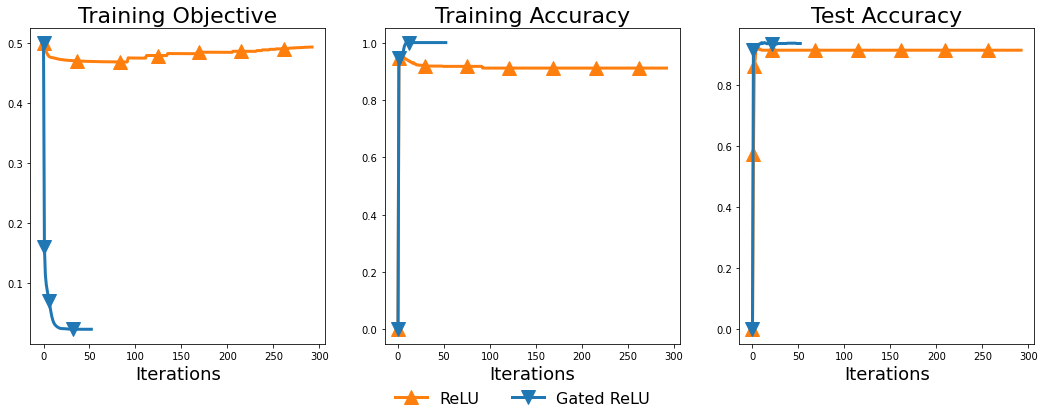

In [11]:
fig = plt.figure(figsize=(18,6))
spec = fig.add_gridspec(ncols=3, nrows=1)
ax0 = fig.add_subplot(spec[0, 0])

ax0.plot(np.arange(len(relu_metrics.objective)), 
         relu_metrics.objective, 
         label="ReLU", 
         color="#ff7f0e",
         marker="^",
         markevery=0.1,
         markersize=14,
         linewidth="3")

ax0.plot(np.arange(len(grelu_metrics.objective)), 
         grelu_metrics.objective, 
         label="Gated ReLU", 
         color="#1f77b4",
         marker="v", 
         markevery=0.1,
         markersize=14,
         linewidth="3"
        )

ax0.set_title("Training Objective", fontsize=22)
ax0.set_xlabel("Iterations", fontsize=18)

ax1 = fig.add_subplot(spec[0, 1])

ax1.plot(np.arange(len(relu_metrics.train_accuracy)), 
         relu_metrics.train_accuracy, 
         label="Relu", 
         color="#ff7f0e",
         marker="^",
         markevery=0.1,
         markersize=14,
         linewidth="3")

ax1.plot(np.arange(len(grelu_metrics.train_accuracy)), 
         grelu_metrics.train_accuracy, 
         label="Gated ReLU", 
         color="#1f77b4",
         marker="v", 
         markevery=0.1,
         markersize=14,
         linewidth="3"
        )

ax1.set_title("Training Accuracy", fontsize=22)
ax1.set_xlabel("Iterations", fontsize=18)

ax2 = fig.add_subplot(spec[0, 2])


ax2.plot(np.arange(len(relu_metrics.test_accuracy)), 
         relu_metrics.test_accuracy, 
         label="Relu", 
         color="#ff7f0e",
         marker="^",
         markevery=0.1,
         markersize=14,
         linewidth="3")

ax2.plot(np.arange(len(grelu_metrics.test_accuracy)), 
         grelu_metrics.test_accuracy, 
         label="Gated ReLU", 
         color="#1f77b4",
         marker="v", 
         markevery=0.1,
         markersize=14,
         linewidth="3"
        )

ax2.set_title("Test Accuracy", fontsize=22)
ax2.set_xlabel("Iterations", fontsize=18)
handles, labels = ax0.get_legend_handles_labels()
legend = fig.legend(
    handles=handles,
    labels=labels,
    loc="lower center",
    borderaxespad=0.1,
    fancybox=False,
    shadow=False,
    ncol=2,
    fontsize=16,
    frameon=False,
)
fig.subplots_adjust(
    bottom=0.15,
)

In [12]:
# Super-fast least-squares solver.
model = ConvexGatedReLU(G)
solver = LeastSquaresSolver(model, tol=1e-8)
regularizer = L2(0.01)
lstsq_model, lstsq_metrics = optimize_model(
    model,
    solver,
    metrics,
    X_train, 
    y_train, 
    X_test, 
    y_test,
    regularizer=regularizer,
    verbose=True,
)

INFO:convex_nn:Pre-Training Metrics: Train Set objective: 0.5, Train Set grad_norm: 0.09645779567347587, Train Set base_objective: 0.5, Train Set accuracy: 0.0, Train Set nc_squared_error: 0.5, Test Set nc_accuracy: 0.0, Test Set nc_squared_error: 0.5, group_sparsity: 1.0, 
INFO:convex_nn:Post-Training Metrics: Train Set objective: 0.10596883641351104, Train Set grad_norm: 6.485657554101871e-17, Train Set base_objective: 0.10596883641351104, Train Set accuracy: 0.999, Train Set nc_squared_error: 0.05206110466260934, Test Set nc_accuracy: 0.937, Test Set nc_squared_error: 0.11804876749986895, group_sparsity: 0.0, 


In [13]:
# Training Accuracy
np.sum(np.sign(lstsq_model(X_train)) == y_train) / len(y_train)

0.998

In [14]:
solver = CVXPYSolver(model, "mosek", clean_sol=True)

In [15]:
# Interior-point solver using CXVPY.
model = ConvexGatedReLU(G)
solver = CVXPYSolver(model, "mosek", clean_sol=True)
regularizer = NeuronGL1(0.01)
cvxpy_model, cvxpy_metrics = optimize_model(
    model,
    solver,
    metrics,
    X_train, 
    y_train, 
    X_test, 
    y_test,
    regularizer=regularizer,
    verbose=True,
)

INFO:convex_nn:Pre-Training Metrics: Train Set objective: 0.5, Train Set grad_norm: 0.007889373725978205, Train Set base_objective: 0.5, Train Set accuracy: 0.0, Train Set nc_squared_error: 0.5, Test Set nc_accuracy: 0.0, Test Set nc_squared_error: 0.5, group_sparsity: 1.0, 


                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Mar 15 06:25:56 PM: Your problem has 25000 variables, 0 constraints, and 0 parameters.
(CVXPY) Mar 15 06:25:56 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 15 06:25:56 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 15 06:25:56 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 15 06:25:56 PM: Compiling problem (target solver=MOSEK).
(CVXPY) Mar 15 06:25:56 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffin

INFO:convex_nn:Post-Training Metrics: Train Set objective: 0.45672705611933206, Train Set grad_norm: 1.660297451811895e-10, Train Set base_objective: 0.45672705611933206, Train Set accuracy: 0.95, Train Set nc_squared_error: 0.297693501878627, Test Set nc_accuracy: 0.915, Test Set nc_squared_error: 0.32959689646674556, group_sparsity: 0.954, 
